In [1]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [2]:
def run_tesseract_ocr(image, width, ksize=(5,5), min_threshold=75, max_threshold=200, lang="eng"):
    image_list_title = []
    image_list=[]
    
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2. GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)
    
    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]
    
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    
    receiptCnt = None
    
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02*peri, True)
        
        if len(approx)==4:
            receiptCnt = approx
            break
    if receiptCnt is None:
        raise Exception(("Could not find receipt outline."))
    
    output = image.copy()
    cv2.drawContours(output, [receiptCnt], -1, (0,255,0), 2)
    
    image_list_title.append("Receipt Outline")
    image_list.append(output)
    
    receipt = four_point_transform(org_image, receiptCnt.reshape(4,2)*ratio)
    
    plt_imshow(image_list_title, image_list)
    plt_imshow("Receipt Transform", receipt)
    
    options = "==psm 4"
    
    text = pytesseract.image_to_string(cv2.cvtColor(receipt, cv2.COLOR_BGR2RGB), lang=lang, config=options)
    
    print("[INFO] OCR결과 : ")
    print("=================")
    print(text)

In [3]:
def plt_imshow(title="image", img=None, figsize=(8,5)):
    plt.figure(figsize=figsize)
    
    if type(img) == list:
        if type(title) == list:
            titles = title
        else :
            titles=[]
            
            for i in range(len(img)):
                titles.append(title)
                
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
                
            plt.subplot(1, len(img), i+1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else :
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

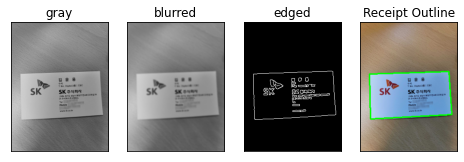

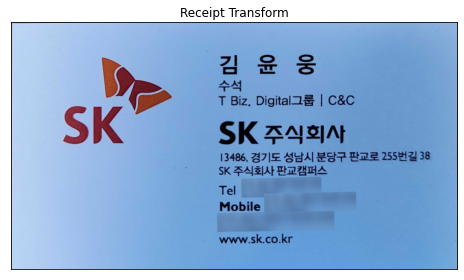

[INFO] OCR결과 : 
=
김 윤 웅
수석
T Biz. Digital | C&C

SK 주식회사

13486, 경기도 성남시 분당구 판교로 25H 38
SK 주식회사 판교캠퍼스

Tel
Mobile

www.sk.co.kr



In [4]:
url = 'https://user-images.githubusercontent.com/69428232/155486780-55525c3c-8f5f-4313-8590-dd69d4ce4111.jpg'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
 
run_tesseract_ocr(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100, lang='kor+eng')